# Algorithm 2:

## Support Vector Machine ( Sigmoid Kernel )

## Importing the necessary Libraries

### numpy
        NumPy is the fundamental package for scientific computing with Python. It contains among other things: a powerful N-dimensional array object; sophisticated (broadcasting) functions

### pandas
        In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.
        
### datetime
        In Python, date, time and datetime classes provides a number of function to deal with dates, times and time intervals. Date and datetime are an object in Python, so when you manipulate them, you are actually manipulating objects and not string or timestamps.
        
### matplotlib
        Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt


## Importing the dataset
This is done in the following way, Using the Pandas Library.
#### Syntax: 
#### pd.read_csv('File_Name')

### Also

### We need to saperate the Independent and the dependent variables, i.e. x and y respectively.
Here the matrix of 784 features are the independednt variable and the target labels corresponding to each image are the dependent variables.

## Making test and the training set
This is done so that the model trained must have some unseen data to test upon. Therefore 10,000 images are kept aside to test the performance of our model upon.

The MNIST dataset is divided in to 4 parts:

## x_train : 
        The dataset over which the model will be trained upon, it is a set of 60,000 greyscale images. Our Logistic Regression Algorithm will be trained over this data
        
## y_train :
        This is the labelled dataset corresponding to the x_train, this contains the target labels corresponding to the Images of the dataset.
        
## x_test : 
        This is the dataset kept aside to test the Machine Learning model trained upon the Dataset x_train, so that out model will have unseen data to predict and test upon.
        
## y_test :
        This is the labelled dataset corresponding to the x_train, this contains the target labels corresponding to the Images of the dataset.

In [2]:
x_train = pd.read_csv('train_images.csv').values
y_train = pd.read_csv('train_labels.csv').values
x_test  = pd.read_csv('test_images.csv').values
y_test  = pd.read_csv('test_labels.csv').values

## Feature Scaling:
Feature scaling is a method used to standardize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

### Standardization
In machine learning, we can handle various types of data, e.g. audio signals and pixel values for image data, and this data can include multiple dimensions. Feature standardization makes the values of each feature in the data have zero-mean (when subtracting the mean in the numerator) and unit-variance. This method is widely used for normalization in many machine learning algorithms (e.g., support vector machines, logistic regression, and neural networks. The general method of calculation is to determine the distribution mean and standard deviation for each feature. Next we subtract the mean from each feature. Then we divide the values (mean is already subtracted) of each feature by its standard deviation.

## Standard Scaler

##  $$x'= \frac{x - mean(x)}{\sigma}$$


## Fitting the Scaler to the x_train
so that the scaler can reshape itself to the X_train Dimensions


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

### Here the warning issued is about the change of values from Interger to Float, which is OKAY for us.

## Now *implementing* the scalar over the x_train and x_test and transforming them to x_train_scaler and x_test_scaler

In [4]:
x_train_scaler = scaler.transform(x_train)
x_test_scaler  = scaler.transform(x_test)


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Dimentionality Reduction
Having too many features in the training set can make the training process extremely slow and makes it unlikely to get a good solution.
In statistics, machine learning, and information theory, dimensionality reduction or dimension reduction is the process of reducing the number of random variables under consideration by obtaining a set of principal variables. It can be divided into feature selection and feature extraction.

## Principal component analysis (PCA)
The main linear technique for dimensionality reduction, principal component analysis, performs a linear mapping of the data to a lower-dimensional space in such a way that the variance of the data in the low-dimensional representation is maximized.

### Ploting the relation between the Variance and the Dimensions

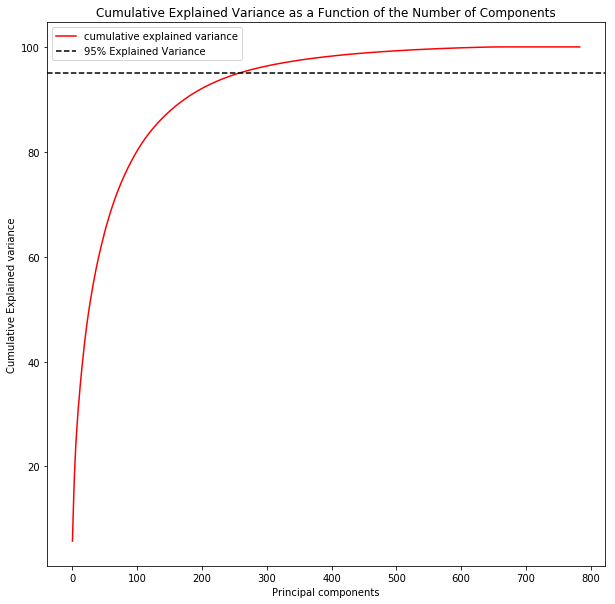

In [5]:
#Using elbow to variance/dimensions
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_test_scaler)

cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(10, 10))
plt.plot(d,cumsum, color = 'red',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.legend(loc='best')


### Applying PCA and Transforming x_train_scaler and x_test_scaler to x_train_pca and x_test_pca respectively

In [6]:
from sklearn.decomposition import PCA
pca = PCA(.95) 
pca.fit(x_train_scaler)

x_train_pca = pca.transform(x_train_scaler)
x_test_pca  = pca.transform(x_test_scaler)



Here the the min Variance is set to 95%, therefore the the minimum dimentions are chosen keeping the stated Variance.

## Comparing the images before and after applying the PCA

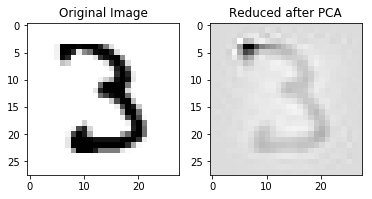

In [7]:
sample = x_train[12345]
sample.shape = (28,28)


a = plt.subplot(1,2,1)
a.set_title('Original Image')
plt.imshow(sample, cmap = plt.cm.gray_r)

sample = pca.inverse_transform(x_train_pca[12345])
sample.shape = (28,28)

b = plt.subplot(1,2,2)
b.set_title("Reduced after PCA")
plt.imshow(sample, cmap = plt.cm.gray_r)



## Support Vector Machine: (Sigmoid Kernel)
It is a machine learning approach used for classification and regression analysis. It depends on supervised learning models and trained by learning algorithms. They analyze the large amount of data to identify patterns from them.

An SVM generates parallel partitions by generating two parallel lines. For each category of data in a high-dimensional space and uses almost all attributes. It separates the space in a single pass to generate flat and linear partitions. Divide the 2 categories by a clear gap that should be as wide as possible. Do this partitioning by a plane called hyperplane.

An SVM creates hyperplanes that have the largest margin in a high-dimensional space to separate given data into classes. The margin between the 2 classes represents the longest distance between closest data points of those classes.

The larger the margin, the lower is the generalization error of the classifier.

After training map the new data to same space to predict which category they belong to. Categorize the new data into different partitions and achieve it by training data.

Of all the available classifiers, SVM provides the largest flexibility.

SVMs are like probabilistic approaches but do not consider dependencies among attributes.

###### MNIST dataset in a Multivariate Classification problem with 10 classes ( 0, 1, 2, ... , 9)





## Applying the Support Vector Machine: ( Sigmoid Kernel )

In [8]:
from sklearn.svm import SVC
svm_sig=SVC(kernel='sigmoid',random_state=0)

# Train the traing model
tick = datetime.datetime.now()
svm_sig.fit(x_train_pca, y_train)
tock = datetime.datetime.now()
svm_sig_train_time = tock - tick
print(svm_sig_train_time)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0:03:45.538767


## Predicting values on training set

In [9]:
tick = datetime.datetime.now()
svm_sig_train_predict = svm_sig.predict(x_train_pca)
tock = datetime.datetime.now()
svm_sig_pred_train_time = tock - tick
print(svm_sig_pred_train_time)

0:06:46.325961


## Confusion Matrix (Training Set)
In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix,is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one (in unsupervised learning it is usually called a matching matrix). Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa).The name stems from the fact that it makes it easy to see if the system is confusing two classes (i.e. commonly mislabelling one as another).

It is a special kind of contingency table, with two dimensions ("actual" and "predicted"), and identical sets of "classes" in both dimensions (each combination of dimension and class is a variable in the contingency table).

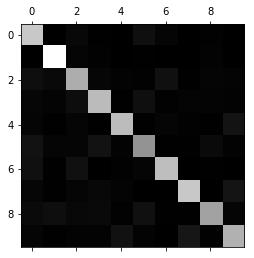

In [10]:
#Making the confusion Matrix

from sklearn.metrics import confusion_matrix
cf= confusion_matrix(y_train, svm_sig_train_predict)

# Visualizing the Confusion Matrix`

plt.matshow(cf , cmap = plt.cm.gray, )




### Here the rows represent the ACTUAL CLASS and the columns represent PREDICTED CLASS.
the whiteness across the diagonal shows the high values that Most of the class were predicted correctly.

## Error Analysis (Training Set)

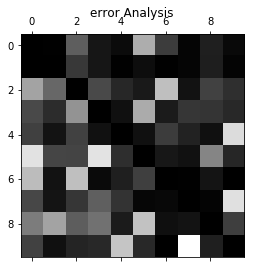

In [11]:
# Analyzing the Errors
row_sums = cf.sum(axis=1 , keepdims = True)
normal_cf = cf/row_sums

np.fill_diagonal(normal_cf,0)
plt.matshow(normal_cf,cmap = plt.cm.gray)

plt.title("error Analysis")
plt.show()



### Looking at the error analysis:

#### most prominent errors are:

$4,9$ but not &9,4&

$9,7$ and $7,9$

$8,5$ but not $5,8$

$5,3$ but not $3,5$



##### That is these values were often misunderstood ,
##### but it should also be noted that the most of the errors are not symmetrical.

## Accuracy on Training Set

In [12]:
svm_sig.score(x_train_pca, y_train)


0.7852464207736796

##### Accuracy on the training set came out to be $78.52$% which is vey good indeed.

## Predicting values on the Test Set

In [13]:
tick=datetime.datetime.now()
svm_sig_test_predict=svm_sig.predict(x_test_pca)
tock=datetime.datetime.now()
svm_sig_pred_test_time = tock - tick
print(svm_sig_pred_test_time)

0:01:08.005125


## Confusion Matrix (Test Set)

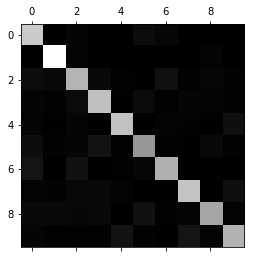

In [14]:
#Making the confusion Matrix

from sklearn.metrics import confusion_matrix
cf= confusion_matrix(y_test, svm_sig_test_predict)

# Visualizing the Confusion Matrix`

plt.matshow(cf , cmap = plt.cm.gray, )
plt.show()




## Error Analysis( Test Set )

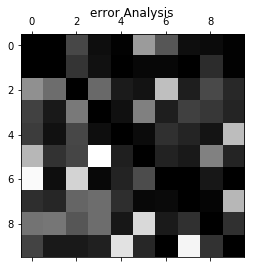

In [15]:
# Analyzing the Errors
row_sums = cf.sum(axis=1 , keepdims = True)
normal_cf = cf/row_sums

np.fill_diagonal(normal_cf,0)
plt.matshow(normal_cf,cmap = plt.cm.gray)

plt.title("error Analysis")
plt.show()



## Accuracy on Test Set

In [16]:
svm_sig_score = svm_sig.score(x_test_pca, y_test)
print(svm_sig_score)

0.7988798879887988


##### As we can see that the errors are not Symmetrical, i.e. 5 is often misunderstood as 3 but 3 is not as misunderstood as 5 THAT OFTEN. 

and overall acuuracyComparitively near to the Training set i.e model works fine.

### Accuracy on the training set came out to be  $79.88$% which Validates that the Model is Good and NOT OVERFITTING.

In [ ]:
%store  svm_sig_score
%store  svm_sig_train_time
%store  svm_sig_pred_test_time